## Initialize

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dftransfer = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/transfer/final_data.csv')

In [5]:
dftransfer.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [6]:
dftransfer.iloc[0]

player                 /david-de-gea/profil/spieler/59377
team                                    Manchester United
name                                         David de Gea
position                                       Goalkeeper
height                                              189.0
age                                                  32.0
appearance                                            104
goals                                                 0.0
assists                                               0.0
yellow cards                                     0.009585
second yellow cards                                   0.0
red cards                                             0.0
goals conceded                                   1.217252
clean sheets                                     0.335463
minutes played                                       9390
days_injured                                           42
games_injured                                           5
award         

In [7]:
dftransfer.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [8]:
# Check if there are any missing values in the entire DataFrame
any_missing = dftransfer.isnull().values.any()
print("Any missing values? ", any_missing)

Any missing values?  False


So, there is no missing value in our dataset.

In [9]:
dftransfer.describe(include='all')

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754,10754,10754,10754,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,...,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
unique,10754,374,10584,16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,46,6,1821,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,...,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,NaN,NaN,NaN,NaN,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,...,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,NaN,NaN,NaN,NaN,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,...,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,...,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,NaN,NaN,NaN,NaN,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,...,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000


We can see *player*, *team*, *name*, and *position* are non-numeric variables and the rest are numeric variables.

In [10]:
print('NUMERIC VARIABLES \n')
print(dftransfer.describe(include=[np.number]))
print('-' * 70)
print('CATEGORICAL VARIABLES \n')
print(dftransfer.describe(include=[object]))

NUMERIC VARIABLES 

             height           age    appearance         goals       assists  \
count  10754.000000  10754.000000  10754.000000  10754.000000  10754.000000   
mean     181.240353     26.041903     36.407011      0.125554      0.086978   
std        6.969818      4.777629     26.526541      0.235585      0.143351   
min      156.000000     15.000000      0.000000      0.000000      0.000000   
25%      176.000000     22.000000     12.000000      0.000000      0.000000   
50%      181.240353     26.000000     35.000000      0.045969      0.040773   
75%      186.000000     29.000000     59.000000      0.172263      0.133136   
max      206.000000     43.000000    107.000000     11.250000      4.000000   

       yellow cards  second yellow cards     red cards  goals conceded  \
count  10754.000000         10754.000000  10754.000000    10754.000000   
mean       0.189757             0.004666      0.006826        0.131655   
std        0.432388             0.025232      

## Fit a Regression Model to Predict Tip

In [11]:
dftransfer.iloc[:, 4:22]

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,189.000000,32.0,104,0.000000,0.000000,0.009585,0.0,0.000000,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,196.000000,30.0,15,0.000000,0.000000,0.069018,0.0,0.000000,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,0.000000,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,175.000000,25.0,82,0.028090,0.056180,0.224719,0.0,0.000000,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,191.000000,30.0,63,0.017889,0.017889,0.053667,0.0,0.000000,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [12]:
# Assign independent(Y) and dependent(X) variables
dftransfer_numeric = dftransfer.iloc[:,4:22] #to include only the numeric variables, luckily they are consecutive
dftransfer_numeric = dftransfer_numeric.drop(columns = ['current_value']) #dropping response variable from dataframe
X = dftransfer_numeric
Y = dftransfer.loc[:,['current_value']]

In [13]:
# Fit linear regression model - aka train model
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [14]:
# Display regression model
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [5247419.3892688]
Coefficients: 
 [[ 9.89314087e+02 -2.17861486e+05 -5.13428517e+04  7.88280676e+05
   1.14351893e+06  7.25782768e+04 -6.68146303e+04 -1.80851641e+05
  -2.86983947e+05  3.15391607e+04  1.16513387e+03  4.20483178e+03
  -4.93139021e+04 -3.33018992e+05  6.05783517e-01 -3.17578086e+04
  -5.73633282e+04]]


In [15]:
dftransfer.iloc[1905]

player                 /flavio-paoletti/profil/spieler/622801
team                                             UC Sampdoria
name                                          Flavio Paoletti
position                           midfield-DefensiveMidfield
height                                                  182.0
age                                                      20.0
appearance                                                 55
goals                                                0.065773
assists                                              0.087698
yellow cards                                         0.285018
second yellow cards                                       0.0
red cards                                                 0.0
goals conceded                                            0.0
clean sheets                                              0.0
minutes played                                           4105
days_injured                                                0
games_in

In [16]:
# Generate new prediction - aka run scoring model
playerx = dftransfer_numeric.iloc[1905] #randomly selecting player
print('Predicted Transfer Fee: \n', regr.predict([playerx]))
print('Real Transfer Fee: \n', dftransfer.loc[4500,'current_value'])

Predicted Transfer Fee: 
 [[3591434.24394673]]
Real Transfer Fee: 
 1500000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


utexas_ds_orie_divider_gray.png

## Explore Data

#### Histogram of tip amounts where the bins cover $1.00 increments

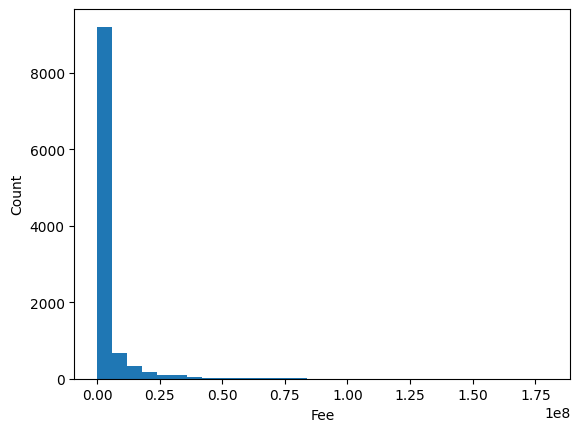

In [17]:
# Set data fields
y = dftransfer.loc[:,'current_value']

# Show plot
plt.hist(y, bins=30)
plt.xlabel('Fee')
plt.ylabel('Count')
plt.show()

                        Range  Frequency
0             0.0 - 6000000.0     9204.0
1      6000000.0 - 12000000.0      678.0
2     12000000.0 - 18000000.0      329.0
3     18000000.0 - 24000000.0      186.0
4     24000000.0 - 30000000.0      107.0
5     30000000.0 - 36000000.0      100.0
6     36000000.0 - 42000000.0       32.0
7     42000000.0 - 48000000.0       18.0
8     48000000.0 - 54000000.0       18.0
9     54000000.0 - 60000000.0        9.0
10    60000000.0 - 66000000.0       23.0
11    66000000.0 - 72000000.0       14.0
12    72000000.0 - 78000000.0        8.0
13    78000000.0 - 84000000.0       10.0
14    84000000.0 - 90000000.0        5.0
15    90000000.0 - 96000000.0        2.0
16   96000000.0 - 102000000.0        4.0
17  102000000.0 - 108000000.0        0.0
18  108000000.0 - 114000000.0        3.0
19  114000000.0 - 120000000.0        0.0
20  120000000.0 - 126000000.0        1.0
21  126000000.0 - 132000000.0        0.0
22  132000000.0 - 138000000.0        0.0
23  138000000.0 

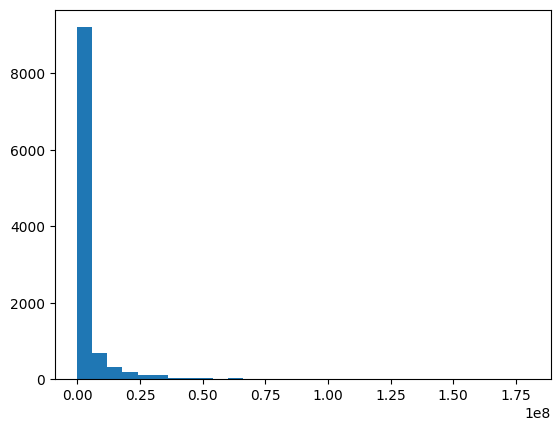

In [22]:
counts, bin_edges, patches = plt.hist(y,bins=30)
# Calculate the range of bins
bin_ranges = [f"{bin_edges[i]} - {bin_edges[i+1]}" for i in range(len(bin_edges)-1)]

# Create a DataFrame
hist_df = pd.DataFrame({
    "Range": bin_ranges,
    "Frequency": counts
})

# Display the DataFrame
print(hist_df)

The distribution of values is skewed left. And we can see, the players are very rare over the transfer fee 84,000,000.

#### Histogram of tip amounts where the bins cover $0.10 increments

An interesting phenomenon is visible: peaks occur at the whole-dollar and half-dollar amounts, which is caused by customers picking round numbers as tips. This behavior is common to other types of purchases too, like gasoline.

#### Scatterplot of tips vs. bill

[5.66891155e-01 1.35113062e+05]  
0.5669 x + 1.351e+05


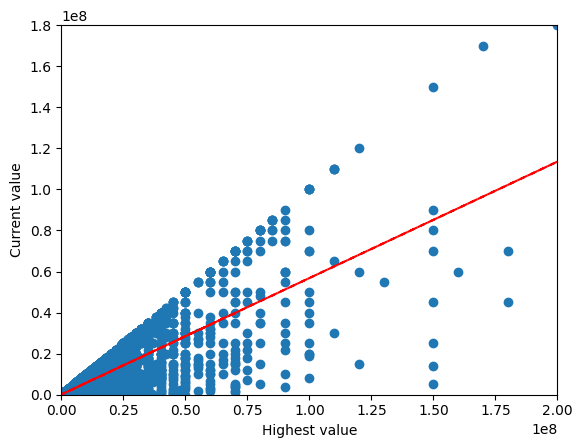

In [27]:
# Set data fields
x = dftransfer.loc[:,'highest_value']
y = dftransfer.loc[:,'current_value']

# Generate trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
print(z,p)
# Show plot
plt.scatter(x, y)
plt.plot(x,p(x),"r--")
plt.xlim(0,np.max(x))
plt.ylim(0,np.max(y))
plt.xlabel('Highest value')
plt.ylabel('Current value')
plt.show()

As some players have the highest value currently, we see x=y for some players. And red line visibly below x=y line implies that no matter how high once they are priced, they can lose value on the market. It may be caused by age and position. Let's also check that.

#### Scatterplot of tips vs. bill separated by payer gender and smoking section status

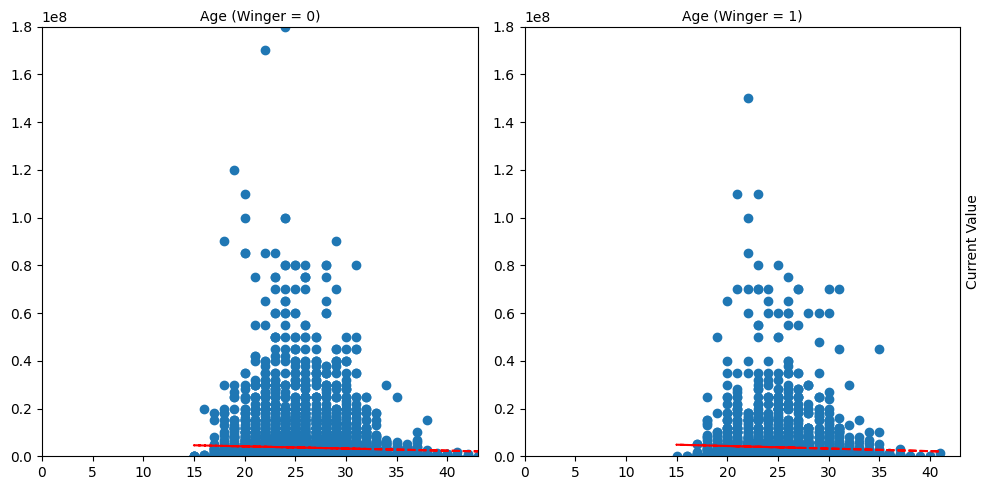

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

## Left plot (Winger = 0)
x = dftransfer.loc[dftransfer['winger'] == 0, 'age']
y = dftransfer.loc[dftransfer['winger'] == 0, 'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[0].scatter(x, y)
axs[0].plot(x, p(x), "r--")
axs[0].set_xlim(0, np.max(dftransfer['age']))
axs[0].set_ylim(0, np.max(dftransfer['current_value']))
axs[0].set_xlabel('Age (Winger = 0)')
axs[0].xaxis.set_label_position("top")
# axs[0].set_ylabel('Current Value')
# axs[0].yaxis.set_label_position("right")

## Right plot (Winger = 1)
x = dftransfer.loc[dftransfer['winger'] == 1, 'age']
y = dftransfer.loc[dftransfer['winger'] == 1, 'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[1].scatter(x, y)
axs[1].plot(x, p(x), "r--")
axs[1].set_xlim(0, np.max(dftransfer['age']))
axs[1].set_ylim(0, np.max(dftransfer['current_value']))
axs[1].set_xlabel('Age (Winger = 1)')
axs[1].xaxis.set_label_position("top")
axs[1].set_ylabel('Current Value')
axs[1].yaxis.set_label_position("right")

# Adjust layout
plt.tight_layout()
plt.show()


The only difference we can observe here is that as players age, non winger players can play longer.